<a href="https://colab.research.google.com/github/ItikaKhandelwal/ItikaKhandelwal/blob/main/Stock_price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn seaborn


In [2]:
pip install xgboost keras tensorflow

In [19]:
import yfinance as yf

ticker = "AAPL"  # Apple as an example

stock_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
stock_data.reset_index(inplace=True)  # Make sure 'Date' is a column, not index
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
1,2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2,2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700
3,2023-01-06,127.962410,128.623840,123.292902,124.398582,87754700
4,2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800


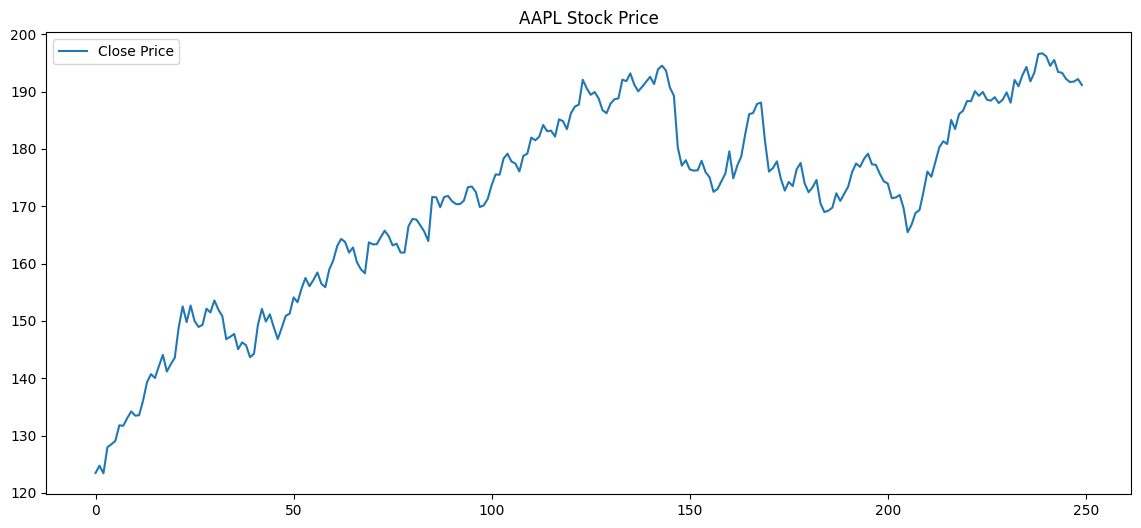

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.legend()
plt.show()



In [21]:
stock_data['MA30'] = stock_data['Close'].rolling(window=30).mean()
stock_data['MA100'] = stock_data['Close'].rolling(window=100).mean()
stock_data.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = stock_data[['MA30', 'MA100']]
target = stock_data['Close']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)
y_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.0482887959276712


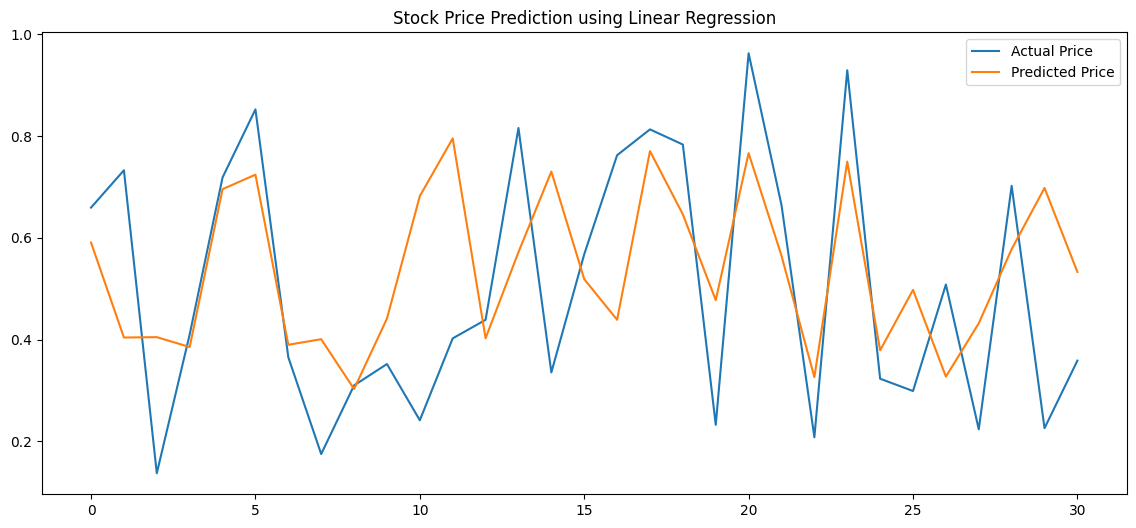

In [23]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction using Linear Regression')
plt.show()


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# reshape inputs [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3761
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3556
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3085
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2843
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2909
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2294 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2062 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1692
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1336
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1154 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0876
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0695
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0661 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0671
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0638
Epoch 16/20
4/4 ━━━━━━━━━━━━━━

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, xgb_pred))


MSE: 0.011716657457141821


In [26]:
import joblib
joblib.dump(model, 'stock_price_predictor.pkl')


['stock_price_predictor.pkl']

In [27]:
import requests

# Replace 'AAPL' with your target stock ticker
url = ('https://newsapi.org/v2/everything?q=tesla&from=2025-06-12&sortBy=publishedAt&apiKey=85a329fbf2854a028c7b5651c044dd48')
response = requests.get(url)
news_data = response.json()

# Extract dates and headlines
date_list = []
headline_list = []

for article in news_data['articles']:
    date = article['publishedAt'][:10]  # keep only the YYYY-MM-DD part
    headline = article['title']
    date_list.append(date)
    headline_list.append(headline)



In [28]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.lower().split()
    stop_words = set(stopwords.words('english'))
    return " ".join([w for w in words if w not in stop_words])


In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiments = [sid.polarity_scores(headline)['compound'] for headline in headline]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Step 1: Get headlines + dates
date_list = []
headline_list = []

for article in news_data['articles']:
    if 'title' in article and article['title'] and 'publishedAt' in article:
        headline = article['title']
        date = article['publishedAt'][:10]
        date_list.append(date)
        headline_list.append(headline)

# Confirm length consistency
assert len(date_list) == len(headline_list), f"Mismatched lengths: {len(date_list)} vs {len(headline_list)}"

# Step 2: Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Only compute sentiment for headlines that exist
sentiments = [sid.polarity_scores(headline)['compound'] for headline in headline_list]

# Final check
assert len(sentiments) == len(date_list), f"Sentiment mismatch: {len(sentiments)} vs {len(date_list)}"

# Step 3: Create DataFrame
df_sentiment = pd.DataFrame({
    'Date': pd.to_datetime(date_list),
    'Sentiment': sentiments
})

print("Date count:", len(date_list))
print("Headline count:", len(headline_list))
print("Sentiment count:", len(sentiments))



Date count: 98
Headline count: 98
Sentiment count: 98


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
